<font size=7> Vector Plot <font color="red"> - attempt 1

Here we try we take a set of pairs of neurla units and we create "vector plot" from them. A vector points in the direction from 1 neural unit to the other, except it has a fixed length.

# Set Up Notebook

import useful code

In [2]:
%run "/workspaces/human_hippocampus/dev/elliott/Cross_Correlation/Instant_Firing_Rate_Source_Code.ipynb"

In [4]:
%run "/workspaces/human_hippocampus/dev/elliott/Latencies/Latencies_Source_Code.ipynb"

load dataset list of pairs

In [5]:
import pickle
file = open('/workspaces/human_hippocampus/data/arrows/pairs/deltas_20ms_cuttoff_2_15ms.pkl', 'rb')
arrows = pickle.load(file)
file.close()

load original raster dataset

In [6]:
import pickle
file = open('/workspaces/human_hippocampus/data/ephys/2023-04-02-e-hc328_unperturbed/StitchedDataUpdated.pkl', 'rb')
sd = pickle.load(file)
file.close()

# Step 1 - Create plot for 1 arrow

## previous plot

/tmp/ipykernel_1265/2822318796.py:5: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_1265/2822318796.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(


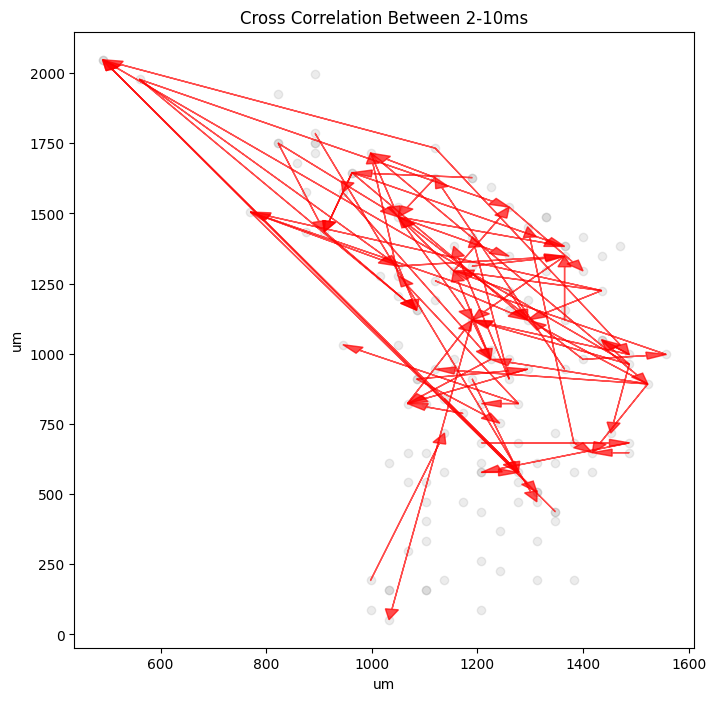

In [7]:
plotLagsLayout(sd, arrows["lags"], arrows["pairs"])

In [8]:
def plotLagsLayout(sd, lags, pairs):
    
    neuron_x = []
    neuron_y = []
    for neuron in sd.neuron_data[0].values():
        neuron_x.append(neuron['position'][0])
        neuron_y.append(neuron['position'][1])
    plt.figure(figsize=(8, 8))
    plt.scatter(neuron_x, neuron_y, alpha=0.15, c='grey')

    for i in range(len(lags)):
        if lags[i]<0:
            start_i = pairs[i][0] 
            end_i = pairs[i][1] 
        else:
            start_i = pairs[i][1] 
            end_i = pairs[i][0] 

        arrow_color = "red"
        arrow = FancyArrow(
            neuron_x[end_i], neuron_y[end_i],
            neuron_x[start_i] - neuron_x[end_i], neuron_y[start_i] - neuron_y[end_i],
            length_includes_head=True, head_width=25,
            linewidth=1, color=arrow_color, alpha=0.7, edgecolor=arrow_color, facecolor=arrow_color)
        plt.gca().add_patch(arrow)

    plt.xlabel('um')
    plt.ylabel('um')
    plt.title("Cross Correlation Between 2-10ms")
    plt.show()

/tmp/ipykernel_1265/1863040085.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


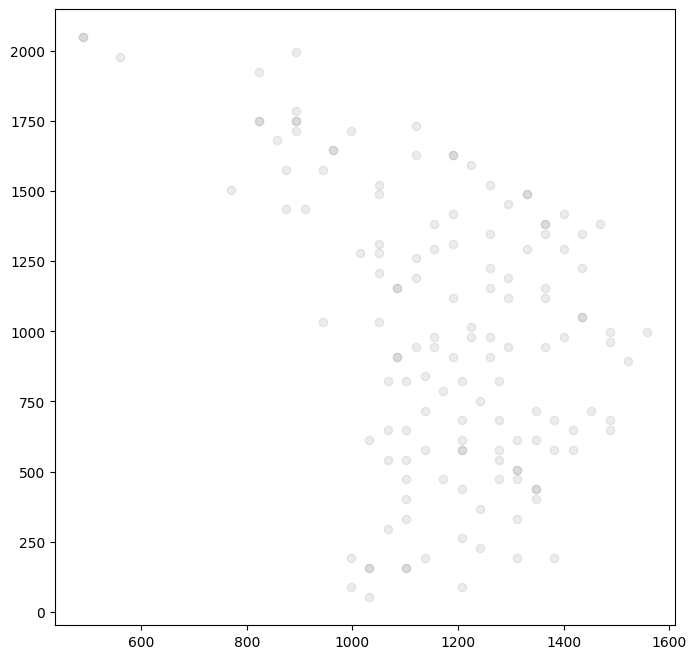

# Put data in format like perceptron homework to normalize arrows

get points

/tmp/ipykernel_1265/1863040085.py:3: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():


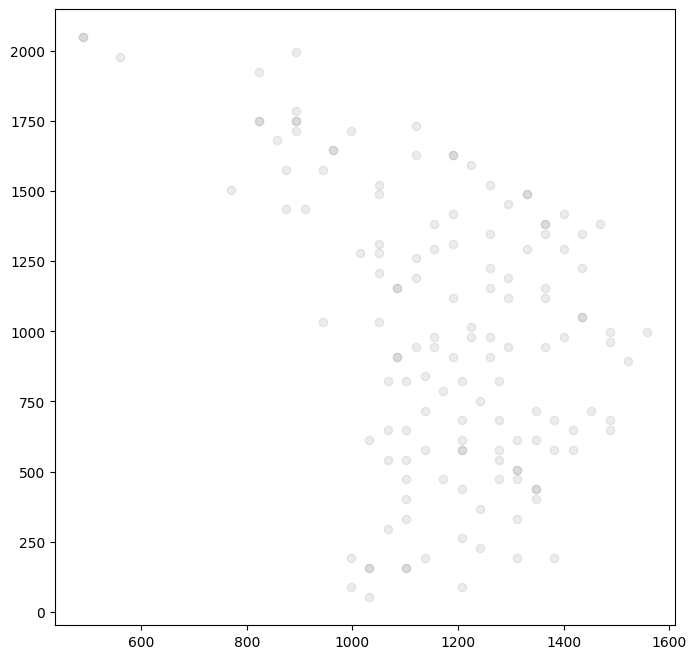

In [18]:
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
plt.figure(figsize=(8, 8))
plt.scatter(neuron_x, neuron_y, alpha=0.15, c='grey')

swap pairs depending on arrows direction

In [19]:
pairs = arrows["pairs"]
lags = arrows["lags"]

In [26]:
#

In [25]:
#lags

In [23]:
for i in range(len(pairs)):
    if lags[i]<0:
        pairs[i] = [ pairs[i][1], pairs[i][0] ]

create a `np.arrays` of start and end coordinates called `starts` and `ends`

In [35]:
starts = []
for start in pairs[:,0]:
    starts.append( [ neuron_x[start], neuron_y[start] ] )

ends = []
for end in pairs[:,1]:
    ends.append( [ neuron_x[end], neuron_y[end] ] )

starts = np.array(starts)
ends = np.array(ends)

subtract arrow starts from arrow ends in order to get arrow angle and magniturde centered aroudn the origen

In [43]:
centered = ends-starts

normalize centered arrows. Then multiply by some constant to make the arrows looks the right size on the graph

In [44]:
import sklearn

In [69]:
normalized = sklearn.preprocessing.normalize(centered) * 75

Add normalized arrow directions back to the starting positions

In [50]:
ends_norm = starts + normalized

Plot resulting arrows

In [52]:
i

0

In [55]:
starts[i][0]

770.0

In [62]:
ends_norm

array([[ 811.20209621, 1476.67355886],
       [1388.91823124, 1244.40285   ],
       [1515.47144825, 1024.58506669],
       [ 793.88859735, 1461.07580488],
       [1218.39748528, 1252.73500981],
       [1131.05739347, 1338.89477865],
       [1386.49287499, 1237.12678125],
       [1214.15347711, 1028.80935301],
       [1175.95290887, 1340.39796923],
       [1472.91997944,  898.9669592 ],
       [1060.84652289, 1263.69064699],
       [1099.69418673, 1318.0215763 ],
       [ 589.6599519 , 1937.24720813],
       [1275.8113883 , 1177.5658351 ],
       [1125.0658351 ,  803.3113883 ],
       [1120.35533906,  874.64466094],
       [1067.79976638, 1440.77561325],
       [1441.26609508, 1016.53749026],
       [1443.31060418,  985.89438602],
       [1086.53749026,  868.73390492],
       [1202.12678125, 1071.49287499],
       [1182.70195633, 1070.53548182],
       [1334.51446196, 1307.86880054],
       [ 936.499947  , 1392.6000848 ],
       [ 586.90177265, 1935.35388952],
       [1348.10676232,  9

In [61]:
starts[i][0]
start[i][1]
ends_norm[i][0]
ends_norm[i][1]

IndexError: invalid index to scalar variable.

/tmp/ipykernel_1265/2037801442.py:1: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  plt.arrow( starts[i][0], starts[i][1], ends_norm[i][0], ends_norm[i][1], length_includes_head=True, head_width=25,


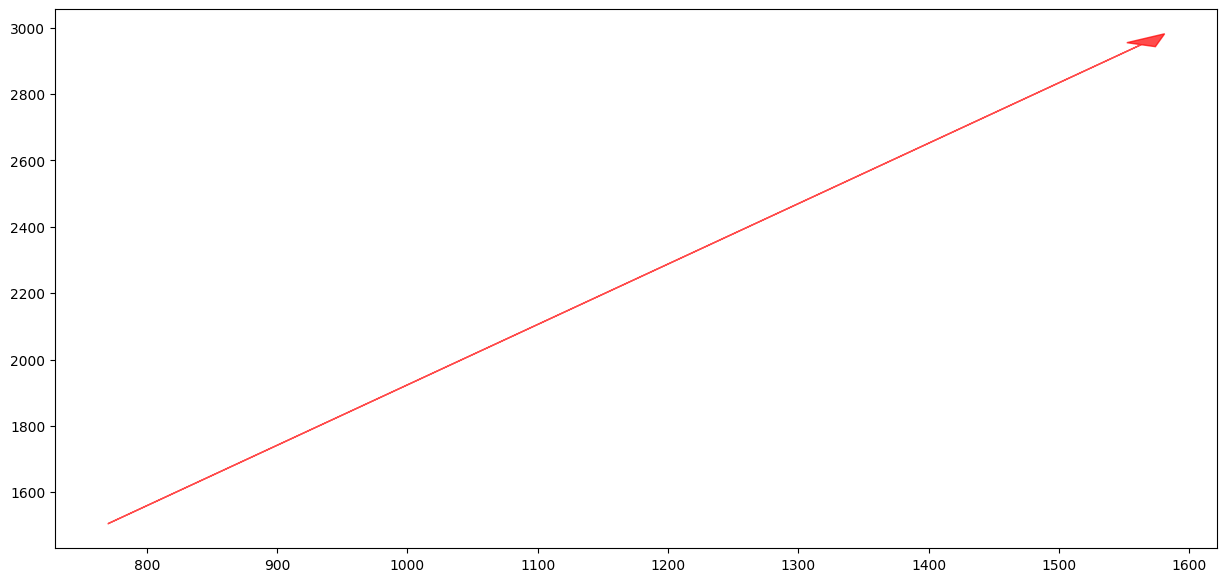

In [63]:
plt.arrow( starts[i][0], starts[i][1], ends_norm[i][0], ends_norm[i][1], length_includes_head=True, head_width=25,
            linewidth=1, color=arrow_color, alpha=0.7, edgecolor=arrow_color, facecolor=arrow_color)

/tmp/ipykernel_1265/152999795.py:4: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for neuron in sd.neuron_data[0].values():
/tmp/ipykernel_1265/152999795.py:13: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  arrow = FancyArrow(


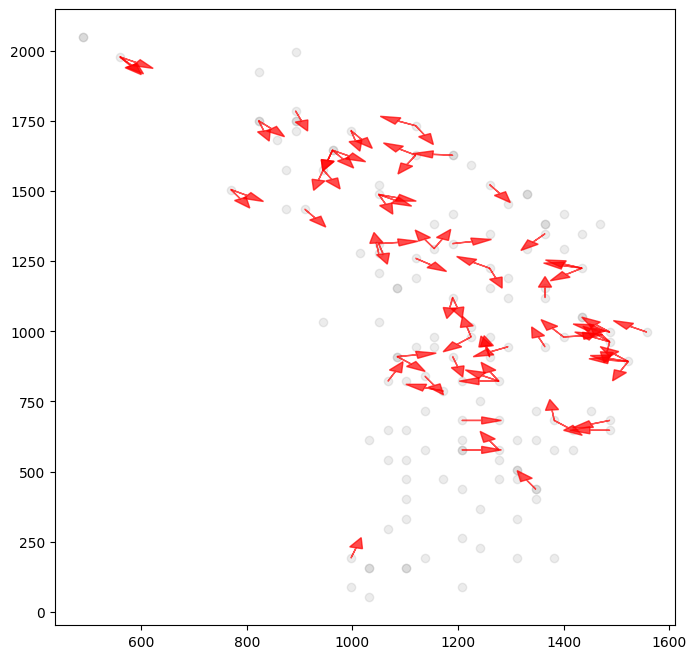

In [70]:
# Plot original scatter
neuron_x = []
neuron_y = []
for neuron in sd.neuron_data[0].values():
    neuron_x.append(neuron['position'][0])
    neuron_y.append(neuron['position'][1])
plt.figure(figsize=(8, 8))
plt.scatter(neuron_x, neuron_y, alpha=0.15, c='grey')

# Create Arrows
arrow_color = "red"
for i in range(len(starts)):
    arrow = FancyArrow( 
            starts[i][0], starts[i][1], normalized[i][0], normalized[i][1], length_includes_head=True, head_width=25,
            linewidth=1, color=arrow_color, alpha=0.7, edgecolor=arrow_color, facecolor=arrow_color )
    plt.gca().add_patch(arrow)

In [13]:
neuron_x[start_i]
neuron_y[start_i]

1312.5

# <font color="brown">Perceptron Code

In [21]:
# Basic Packages
from math import cos, sin, pi
from sklearn.datasets import load_iris   # Package to laod data
import sklearn
from matplotlib import pyplot as plt     # Common plotting package
from matplotlib.patches import Patch, Circle     # Package to add colors in legend
import numpy as np                       # Common package for working wit data
import random



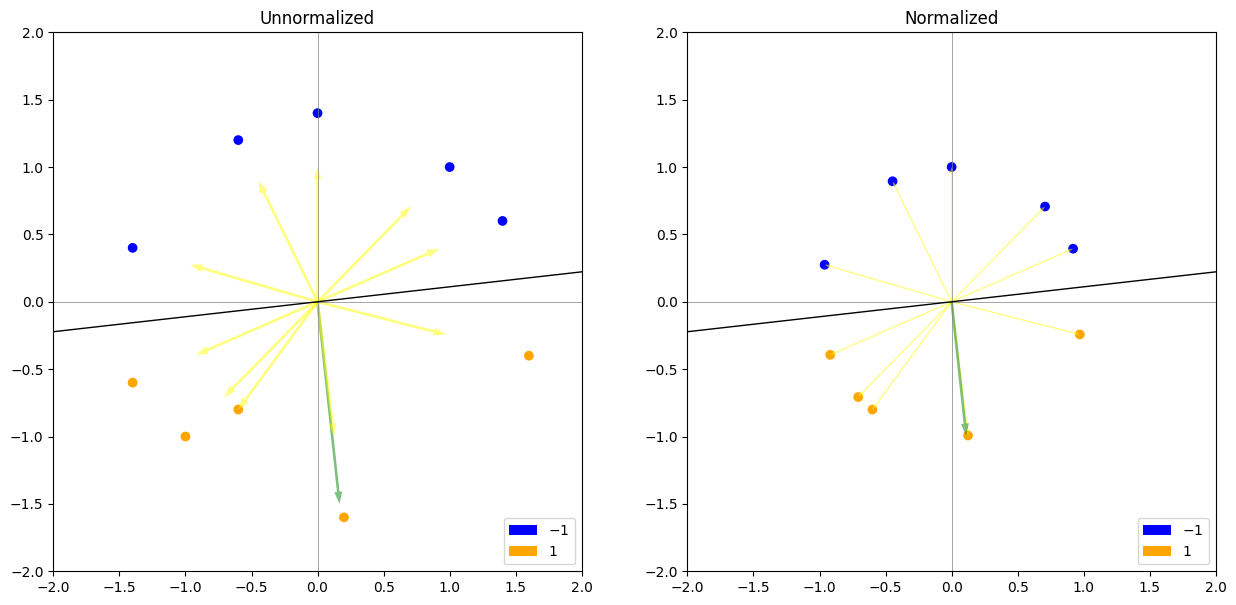

In [22]:
plt.rcParams["figure.figsize"]=15,7              # Set size of plot
# Create Initial Data
x = np.array([[-.7,.2],[.5,.5],[.7,.3],[-.3,.6],[0,.7],[-.5,-.5],[.8,-.2],[.1,-.8],[-.7,-.3],[-.3,-.4]])  
x = x * 2
y = np.array([-1,-1,-1,-1,-1,1,1,1,1,1])     #y = np.array([1,1,1,1,1,-1,-1,-1,-1,-1]) # alternate example

# Creat sublot framework
fig, (plt1, plt2) = plt.subplots(1, 2)

# Create First Plot Draw Scatter of initial Data
plt1.axhline(0, color="gray", linewidth=.5)
plt1.axvline(0, color='gray', linewidth=.5)
colormap = np.array(['dummy', 'orange', 'blue'])
plt1.scatter( x[:,0], x[:,1], c=colormap[y]) #c=colormap[y])#, cmap=colormap[y])         # Create scatter plot of data
plt1.legend( [Patch(facecolor="b"),Patch(facecolor="orange")], ["$-1$","$1$"], loc="lower right")       # Add legend
plt1.set_title("Unnormalized")
plt1.axis([-2, 2, -2, 2]) 
#plt.axis([-1, 1, -1, 1])    

# Draw data initial weights for  w=[ 0.5 -4.5]
w=np.array([ 0.5, -4.5])/3
plt1.arrow(0, 0, w[0], w[1], facecolor="g",alpha=.5, width = 0.02, length_includes_head=True, edgecolor="None") 
plt1.plot( [-10,10], -w[0]/w[1] * np.array([-10,10]), c="black", linewidth=1)    # Linear classifier line

# Normalize data and draw scatter
x_norm = sklearn.preprocessing.normalize(x)
w_norm = sklearn.preprocessing.normalize(w.reshape(1, -1))[0]
for i in x_norm:
    plt1.arrow(0, 0, i[0], i[1], facecolor="yellow",alpha=.5, width = 0.02, length_includes_head=True, edgecolor="None") 

# Create Second Plot
# Create data points
plt2.axhline(0, color="gray", linewidth=.5)
plt2.axvline(0, color='gray', linewidth=.5)
colormap = np.array(['dummy', 'orange', 'blue'])
plt2.scatter( x_norm[:,0], x_norm[:,1], c=colormap[y]) #c=colormap[y])#, cmap=colormap[y])         # Create scatter plot of data
plt2.legend( [Patch(facecolor="b"),Patch(facecolor="orange")], ["$-1$","$1$"], loc="lower right")       # Add legend
plt2.axis([-2, 2, -2, 2])  #axis([-1.1, 1.1, -1.1, 1.1])  
plt2.set_title("Normalized")

# Create Arrows
for i in x_norm:
    plt2.arrow(0, 0, i[0], i[1], facecolor="yellow",alpha=.5, width = 0.01, length_includes_head=True, edgecolor="None") 
plt2.arrow(0, 0, w_norm[0], w_norm[1], facecolor="g",alpha=.5, width = 0.02, length_includes_head=True, edgecolor="None") 
plt2.plot( [-10,10], -w[0]/w[1] * np.array([-10,10]), c="black", linewidth=1)    # Linear classifier linea